# Titanic - Machine Learning from Disaster

## 1 - Imports

In [172]:
import numpy as np
import pandas as pd
import tensorflow as tf
from utils import *

## 2 - Data

#### 2.1 Importing data

In [173]:
train_data = pd.read_csv ('./data/train.csv')
test_data = pd.read_csv ('./data/test.csv')
y_test = pd.read_csv ('./data/gender_submission.csv')

#### 2.2 Data repairing

In [174]:
train_data = repair_data(train_data)
test_data = repair_data(test_data)

#### 2.3 Adding new features


<b>2.3.1 Family Members<b/>

In [175]:
train_data = add_new_features(train_data)
test_data = add_new_features(test_data)

#### 2.4 Convering categorical data into numerical data

In [176]:
labels = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Family Members", "Not Alone", "Fare"]
X_train = convert_cat_to_num(train_data[labels])
y_train = train_data[["Survived"]]
X_test = convert_cat_to_num(test_data[labels])
y_test = y_test[["Survived"]]

/Users/adamdabkowski/DataspellProjects/Kaggle/Titanic/utils.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col_name] = pd.factorize(data[col_name])[0]


#### 2.5 Normalization

In [177]:
X_train_z_scaled = X_train.copy()
X_test_z_scaled = X_test.copy()

for column in X_train_z_scaled.columns:
    X_train_z_scaled[column] = (X_train_z_scaled[column] -
                                X_train_z_scaled[column].mean()) / X_train_z_scaled[column].std()

for column in X_test_z_scaled.columns:
    X_test_z_scaled[column] = (X_test_z_scaled[column] -
                               X_test_z_scaled[column].mean()) / X_test_z_scaled[column].std()

X_train = X_train_z_scaled.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test_z_scaled.to_numpy()
y_test = y_test.to_numpy()

print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (891, 8)
y_train.shape:  (891, 1)
X_test.shape:  (418, 8)
y_test.shape:  (418, 1)


#### 2.6 Displaying sample variables

In [178]:
print('The first element of X_train is: ', X_train[0])

The first element of X_train is:  [ 0.82691282 -0.73728105 -0.5654189   0.43255043 -0.47340772  0.05912667
  1.23095354 -0.50216314]


In [179]:
print('The first element of y_train is: ', y_train[0])

The first element of y_train is:  [0]


In [180]:
print('The first element of X_test is: ', X_test[0])

The first element of X_test is:  [ 0.87243644 -0.75502418  0.38576877 -0.49887221 -0.39976865 -0.55278019
 -0.80660628 -0.49681798]


In [181]:
print('The first element of y_test is: ', y_test[0])

The first element of y_test is:  [0]


## 3 - Model

In [182]:
epochs = 75

#### 3.1 Model implementation

In [183]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer((len(labels), )),
        tf.keras.layers.Dense(units=200, activation='relu', name='L1'), # small
        tf.keras.layers.Dense(units=80, activation='relu', name='L2'),
        tf.keras.layers.Dense(units=20, activation='relu', name='L3'),
        tf.keras.layers.Dense(units=1, activation='sigmoid', name='L4'),
        # tf.keras.layers.Dense(units=340, activation='relu', name='L1'), # big
        # tf.keras.layers.Dense(units=280, activation='relu', name='L2'),
        # tf.keras.layers.Dense(units=120, activation='relu', name='L3'),
        # tf.keras.layers.Dense(units=30, activation='relu', name='L4'),
        # tf.keras.layers.Dense(units=1, activation='sigmoid', name='L5'),
    ], name='model'
)

In [184]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 200)               1800      
_________________________________________________________________
L2 (Dense)                   (None, 80)                16080     
_________________________________________________________________
L3 (Dense)                   (None, 20)                1620      
_________________________________________________________________
L4 (Dense)                   (None, 1)                 21        
Total params: 19,521
Trainable params: 19,521
Non-trainable params: 0
_________________________________________________________________


In [185]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=7e-5),
    loss=tf.keras.losses.BinaryCrossentropy()
)
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### 3.2 Model training

In [186]:
history = model.fit(X_train, y_train, epochs=epochs)

Train on 891 samples
Epoch 1/75
891/891 [==============================] - 1s 583us/sample - loss: 0.6841
Epoch 2/75
891/891 [==============================] - 0s 87us/sample - loss: 0.6438
Epoch 3/75
891/891 [==============================] - 0s 84us/sample - loss: 0.6122
Epoch 4/75
891/891 [==============================] - 0s 87us/sample - loss: 0.5801
Epoch 5/75
891/891 [==============================] - 0s 88us/sample - loss: 0.5521
Epoch 6/75
891/891 [==============================] - 0s 86us/sample - loss: 0.5284
Epoch 7/75
891/891 [==============================] - 0s 83us/sample - loss: 0.5078
Epoch 8/75
891/891 [==============================] - 0s 82us/sample - loss: 0.4902
Epoch 9/75
891/891 [==============================] - 0s 83us/sample - loss: 0.4756
Epoch 10/75
891/891 [==============================] - 0s 82us/sample - loss: 0.4633
Epoch 11/75
891/891 [==============================] - 0s 81us/sample - loss: 0.4538
Epoch 12/75
891/891 [==============================]

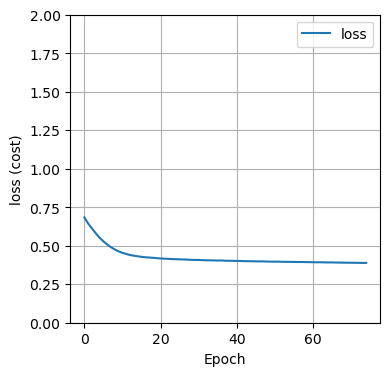

In [187]:
plt_loss_tf(history)

## 4 - Prediction

#### 4.1 Accuracy

<b>4.1.1 Training set</b>

In [188]:
accuracy_train = compute_accuracy(model, X_train, y_train)

Accuracy:  0.8395061728395061


<b>4.1.1 Test set</b>

In [189]:
accuracy_test = compute_accuracy(model, X_test, y_test)

Accuracy:  0.9210526315789473


## 5 - Saving prediction

In [190]:
passengerIds = np.arange(892, 1310)
prediction = get_clear_prediction(model, X_test).squeeze()
prediction = prediction.astype(int)

result = pd.DataFrame({
    'PassengerId': passengerIds,
    'Survived': prediction
})

print(result)
result.to_csv(r'./data/result.csv', index=False)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
